<a href="https://colab.research.google.com/github/MittalNeha/Extensive_Vision_AI6/blob/main/week3/Week3_exp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Write a neural network that can:
1. take 2 inputs:
    

> a. an image from MNIST dataset, and
> 

> b. a random number between 0 and 9

2. and gives two outputs:

> a. the "number" that was represented by the MNIST image, and


> b. the "sum" of this number with the random number that was generated and sent as the input to the network




> 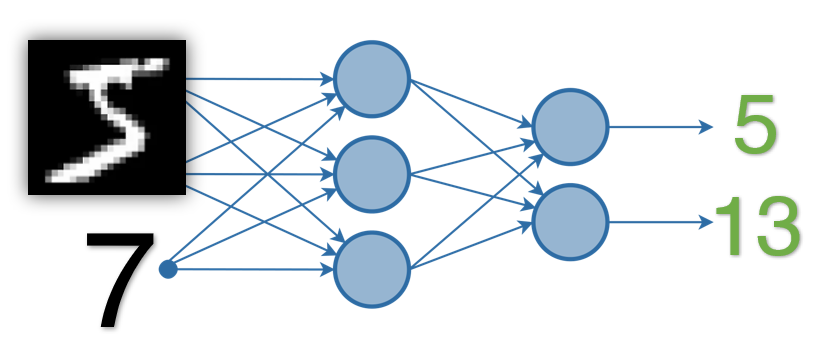



**First lets train MNIST?**

In [1]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
# import torch.utils.data.DataLoader

In [72]:
import torch.optim as optim
import torch.nn.functional as F

BATCH_SIZE = 64

# Loading the data

In [3]:
#Load MNIST dataset
from torchvision import datasets

In [4]:
train_set = datasets.MNIST(root='./data/',
                           train=True, 
                           download=True, 
                           transform=transforms.Compose([
                                                         transforms.ToTensor()
                                                         ]))

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw

Processing...
Done!


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:502: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:143.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


## Custom Dataset

In [5]:
from torch.utils.data import Dataset

class CombinedData(Dataset):
  def __init__(self, datasets):
    self.mnist_data = datasets
    # print(type(datasets))

  def __getitem__(self, index):
    x1, y1 = self.mnist_data[index]
    x2 = torch.randint(0, 9, (1,)).item()
    y2 = y1+x2
    # print(F.one_hot(torch.tensor(x2)))
    return x1, F.one_hot(torch.tensor(x2),10), y1, y2
    

  def __len__(self):
    return len(self.mnist_data)


##Test the custom dataset

In [ ]:
BATCH_SIZE = 10
train_set_comb = CombinedData(train_set)
train_dataloader = torch.utils.data.DataLoader(train_set_comb,
                                               batch_size=BATCH_SIZE,
                                               shuffle=False,
                                               )
print(next(iter(train_dataloader)))

# My Network

## Only train MNIST

In [7]:

class MyNetwork(nn.Module):
  def __init__(self):
    super().__init__()
    
    self.out_classes = 10

    self.conv1 = nn.Conv2d(1, 32, 3, padding=1)   #3

    #convolution block
    self.conv2 = nn.Conv2d(32, 64, 3, padding=1) #5
    self.conv3 = nn.Conv2d(64, 128, 3, padding=1)  #7
    self.conv4 = nn.Conv2d(128, 128, 3, padding=1) #11

    self.pool1 = nn.MaxPool2d(2, stride=2)        #22

    self.conv5 = nn.Conv2d(128, 256, 3, padding=1)  
    self.conv6 = nn.Conv2d(256, 512, 3, padding=1)  

    self.pool2 = nn.MaxPool2d(2, stride=2)

    # self.conv6 = nn.Conv2d(128, 256, 3, padding=1) #18
    # self.conv7 = nn.Conv2d(256, 512, 3, padding=1) #20
    # self.conv8 = nn.Conv2d(512, 512, 3, padding=1)

    self.conv7 = nn.Conv2d(512, 512, 3) #20  5x5
    self.conv8 = nn.Conv2d(512, 512, 3) #3x3
    self.conv9 = nn.Conv2d(512, 10, 3) #1x1

    self.dense1 = nn.Linear(512 * 7 * 7, 1024)


    # self.conv4 = nn.Conv2d(128, 256, 3, padding=1) #11

    # self.pool1 = nn.MaxPool2d(2, stride=2)        #22

    # self.conv5 = nn.Conv2d(256, 256, 3, padding=1)  
    # self.conv6 = nn.Conv2d(256, 512, 3, padding=1)  

    # self.pool2 = nn.MaxPool2d(2, stride=2)

    # # self.conv6 = nn.Conv2d(128, 256, 3, padding=1) #18
    # self.conv7 = nn.Conv2d(512, 512, 3, padding=1) #20
    # self.conv8 = nn.Conv2d(512, 512, 3, padding=1)

    # self.dense1 = nn.Linear(512 * 7 * 7, 1024)
    self.dense2 = nn.Linear(1024, 10)


  def forward(self, t):

    #input Layer we can add the random number here.
    t = t
    t = self.pool1(F.relu(self.conv4(F.relu(self.conv3(F.relu(self.conv2(F.relu( self.conv1(t) ))))))))

    t = (self.pool2(F.relu(self.conv6(F.relu(self.conv5(t) )))))
    t = self.conv9(F.relu(self.conv8(F.relu( self.conv7(t) ))))

    # t = F.relu(self.conv11
    #     (F.relu
    #      (self.conv10
    #       (F.relu(self.conv9(F.relu( self.conv8(t) )))))))
    
    # t = t.view(t.size(0), -1)
    t = t.view(-1, 10)
    # t = t.view(-1, 7 * 7 * 512)
    # t = self.dense2( F.relu( self.dense1(t) ))

    # return(F.softmax(t,dim=1))
    # out = F.softmax(t,dim=1)
    out = F.log_softmax(t, dim=1)

    return out

from torchsummary import summary

use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
model = MyNetwork().to(device)
summary(model, input_size=(1,28,28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 28, 28]             320
            Conv2d-2           [-1, 64, 28, 28]          18,496
            Conv2d-3          [-1, 128, 28, 28]          73,856
            Conv2d-4          [-1, 128, 28, 28]         147,584
         MaxPool2d-5          [-1, 128, 14, 14]               0
            Conv2d-6          [-1, 256, 14, 14]         295,168
            Conv2d-7          [-1, 512, 14, 14]       1,180,160
         MaxPool2d-8            [-1, 512, 7, 7]               0
            Conv2d-9            [-1, 512, 5, 5]       2,359,808
           Conv2d-10            [-1, 512, 3, 3]       2,359,808
           Conv2d-11             [-1, 10, 1, 1]          46,090
Total params: 6,481,290
Trainable params: 6,481,290
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forw

## Small Test Network

##Only MNIST

In [8]:
class MySmallNetwork_MNIST(nn.Module):
  def __init__(self):
    super().__init__()
    
    self.out_classes = 10

    self.conv1 = nn.Conv2d(1, 32, 3, padding=1)   #3

    #convolution block
    self.conv2 = nn.Conv2d(32, 64, 3, padding=1) #5
    

    self.pool1 = nn.MaxPool2d(2, stride=2)        #22

    self.conv5 = nn.Conv2d(64, 128, 3, padding=1)  
    self.conv6 = nn.Conv2d(128, 256, 3, padding=1)  

    self.pool2 = nn.MaxPool2d(2, stride=2)

    self.conv7 = nn.Conv2d(256, 512, 3) #20  5x5
    self.conv8 = nn.Conv2d(512, 1024, 3) #3x3
    self.conv9 = nn.Conv2d(1024, 10, 3) #1x1

  def forward(self, t):

    #input Layer we can add the random number here.
    t = t
    t = self.pool1(F.relu(self.conv2(F.relu( self.conv1(t) ))))

    t = (self.pool2(F.relu(self.conv6(F.relu(self.conv5(t) )))))
    t = F.relu(self.conv9(F.relu(self.conv8(F.relu( self.conv7(t) )))))

    t = t.view(-1, 10)
    # out = F.softmax(t,dim=1)
    out = F.log_softmax(t, dim=1)

    return out

from torchsummary import summary

use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
model = MySmallNetwork_MNIST().to(device)
summary(model, input_size=(1,28,28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 28, 28]             320
            Conv2d-2           [-1, 64, 28, 28]          18,496
         MaxPool2d-3           [-1, 64, 14, 14]               0
            Conv2d-4          [-1, 128, 14, 14]          73,856
            Conv2d-5          [-1, 256, 14, 14]         295,168
         MaxPool2d-6            [-1, 256, 7, 7]               0
            Conv2d-7            [-1, 512, 5, 5]       1,180,160
            Conv2d-8           [-1, 1024, 3, 3]       4,719,616
            Conv2d-9             [-1, 10, 1, 1]          92,170
Total params: 6,379,786
Trainable params: 6,379,786
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 1.51
Params size (MB): 24.34
Estimated Total Size (MB): 25.85
-------------------------------------

##Combied Network

In [73]:
class MySmallNetwork(nn.Module):
  def __init__(self):
    super().__init__()
    
    self.out_classes = 10

    self.conv1 = nn.Conv2d(1, 32, 3, padding=1)   #3
    self.conv2 = nn.Conv2d(32, 64, 3, padding=1) #5    
    self.pool1 = nn.MaxPool2d(2, stride=2)        #22

    self.conv5 = nn.Conv2d(64, 128, 3, padding=1)  
    self.conv6 = nn.Conv2d(128, 256, 3, padding=1)  
    self.pool2 = nn.MaxPool2d(2, stride=2)

    self.conv7 = nn.Conv2d(256, 512, 3) #20  5x5
    self.conv8 = nn.Conv2d(512, 1024, 3) #3x3
    self.conv9 = nn.Conv2d(1024, 10, 3) #1x1

    #concatenate the second input with the pred_mnist
    self.combined_netw()

  def combined_netw(self):
    self.comL1 = nn.Linear(self.out_classes + 10, 100)
    self.comL2 = nn.Linear(100, 40)
    self.comL3 = nn.Linear(40, 1)

  def forward(self, x1, x2):

    #input Layer we can add the random number here.
    t = x1
    t = self.pool1(F.relu(self.conv2(F.relu( self.conv1(t) ))))
    t = (self.pool2(F.relu(self.conv6(F.relu(self.conv5(t) )))))
    t = self.conv9(F.relu(self.conv8(F.relu( self.conv7(t) ))))

    t = t.view(-1, 10)
    out1 = F.log_softmax(t, dim=1)

    #combine this output with the other input
    in2 = torch.cat((out1, x2.view(-1, 10)), dim=1)

    out = self.comL3( 
        F.relu(self.comL2( 
        F.relu( self.comL1(in2) ))))
    # out = F.sigmoid(self.comL3( F.sigmoid( self.comL1(in2) )))

    # out = self.comL3( 
    #     F.sigmoid(self.comL2( 
    #     F.sigmoid( self.comL1(in2) ))))
        
    return out1, out

from torchsummary import summary

use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
model = MySmallNetwork().to(device)
summary(model, input_size=[(1,28, 28), (1,1,10)])

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 28, 28]             320
            Conv2d-2           [-1, 64, 28, 28]          18,496
         MaxPool2d-3           [-1, 64, 14, 14]               0
            Conv2d-4          [-1, 128, 14, 14]          73,856
            Conv2d-5          [-1, 256, 14, 14]         295,168
         MaxPool2d-6            [-1, 256, 7, 7]               0
            Conv2d-7            [-1, 512, 5, 5]       1,180,160
            Conv2d-8           [-1, 1024, 3, 3]       4,719,616
            Conv2d-9             [-1, 10, 1, 1]          92,170
           Linear-10                  [-1, 100]           2,100
           Linear-11                   [-1, 40]           4,040
           Linear-12                    [-1, 1]              41
Total params: 6,385,967
Trainable params: 6,385,967
Non-trainable params: 0
---------------------------

# Train the model

In [10]:
def get_corr_pred(pred, truth):

  #Returns the total number of correct predictions
  return pred.argmax(dim=1).eq(truth).sum().item()

##Train MNIST

In [11]:
def train_network(model, optimizer):
  
  n_train = len(train_set)

  train_dataloader = torch.utils.data.DataLoader(train_set,
                                               batch_size=BATCH_SIZE,
                                               shuffle=True,
                                               )

  for epoch in range(10):
    total_loss = 0
    total_correct=0

    model.train()

    for idx, batch in enumerate(train_dataloader):
      images, labels = batch
      images, labels = images.to(device), labels.to(device)

      optimizer.zero_grad()

      preds = model(images)

      loss = F.nll_loss(preds, labels)
      loss.backward()
      optimizer.step()
      
      total_loss += loss.item()
      total_correct += get_corr_pred(preds, labels)

      # if idx % 200 == 0:

      #   print(
      #     "loss: ",  total_loss/(idx+1), 
      #     "correct", total_correct,
      #     # "lr: ", scheduler._last_lr,
          
      # )

    # scheduler.step(total_loss/(n_train/BATCH_SIZE))
    print(
        "epoch ", epoch,
        "loss: ",  total_loss/(n_train/BATCH_SIZE), 
        "correct", total_correct,
        # "lr: ", scheduler._last_lr,
        
    )

# model = MyNetwork().to(device)

# # optimizer = optim.SGD(model.parameters(), lr=0.01,momentum=0.9)
# optimizer = optim.Adam(model.parameters(), lr=0.001)

# train_network(model, optimizer)

## Train combined model

In [91]:
BATCH_SIZE = 64

In [106]:
def train_network(model, optimizer):
  
  n_train = len(train_set)

  train_dataloader = torch.utils.data.DataLoader(train_set_comb,
                                               batch_size=BATCH_SIZE,
                                               shuffle=True,
                                               )

  for epoch in range(30):
    total_loss = 0
    total_correct1=0
    total_correct2=0

    model.train()

    for idx, batch in enumerate(train_dataloader):
      x1, x2, target1, target2 = batch
      x1, x2, target1, target2 = x1.to(device), x2.to(device), target1.to(device), target2.to(device)

      optimizer.zero_grad()

      out1, out2 = model(x1, x2)

      loss1 = F.nll_loss(out1, target1)
      loss2 = F.mse_loss(out2.squeeze(1), target2.float())
      loss = 0.2*loss1 + 0.8*loss2
      # loss = loss1 + loss2

      loss.backward()
      optimizer.step()
      
      total_loss += loss.item()
      total_correct1 += get_corr_pred(out1, target1)
      total_correct2 += out2.int().squeeze(1).eq(target2).sum().item()

      # if idx % 200 == 0:

      #   print(
      #     idx, ":  loss1: ", loss1.item(),":  loss2: ",  loss2.item(),
      #     "  total_correct2: ",  total_correct2,
          
      #     # "lr: ", scheduler._last_lr,
          
      # )

    # scheduler.step(total_loss/(n_train/BATCH_SIZE))
    print(
        "epoch ", epoch,
        "loss: ",  total_loss/(n_train/BATCH_SIZE), 
        "Accuracy Out1", 100* total_correct1/n_train,
        "Accuracy Out2", 100* total_correct2/n_train,
        # "lr: ", scheduler._last_lr,
        
    )

model = MySmallNetwork().to(device)

# optimizer = optim.SGD(model.parameters(), lr=0.01,momentum=0.9)
optimizer = optim.Adam(model.parameters(), lr=0.001)

train_network(model, optimizer)

epoch  0 loss:  6.940269534715017 Accuracy Out1 42.861666666666665 Accuracy Out2 26.718333333333334
epoch  1 loss:  0.6003805548826854 Accuracy Out1 84.80333333333333 Accuracy Out2 45.515
epoch  2 loss:  0.33507512621879576 Accuracy Out1 94.13 Accuracy Out2 48.17333333333333
epoch  3 loss:  0.2491069422006607 Accuracy Out1 96.14 Accuracy Out2 49.05833333333333
epoch  4 loss:  0.19336760875384013 Accuracy Out1 97.26666666666667 Accuracy Out2 49.303333333333335
epoch  5 loss:  0.151010232792298 Accuracy Out1 97.85666666666667 Accuracy Out2 49.02166666666667
epoch  6 loss:  0.11499776363968849 Accuracy Out1 98.345 Accuracy Out2 49.58833333333333
epoch  7 loss:  0.11985011435151101 Accuracy Out1 98.37833333333333 Accuracy Out2 49.54333333333334
epoch  8 loss:  0.09175469259719055 Accuracy Out1 98.735 Accuracy Out2 49.74666666666667
epoch  9 loss:  0.07997768591543039 Accuracy Out1 99.0 Accuracy Out2 49.78
epoch  10 loss:  0.0712071779648463 Accuracy Out1 99.07166666666667 Accuracy Out2 49.

# Experimental Code

In [85]:

BATCH_SIZE = 64
model = MyNetwork().to(device)

train_dataloader = torch.utils.data.DataLoader(train_set_comb,
                                               batch_size=BATCH_SIZE,
                                               shuffle=True,
                                               )
optimizer = optim.Adam(model.parameters(), lr=0.001)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', patience=2)


In [102]:
# torch.set_grad_enabled(True)
# BATCH_SIZE = 2
# model = MySmallNetwork().to(device)
train_dataloader = torch.utils.data.DataLoader(train_set_comb,
                                               batch_size=BATCH_SIZE,
                                               shuffle=True,
                                               )

# train_dataloader = torch.utils.data.DataLoader(train_set_comb,
#                                                batch_size=BATCH_SIZE,
#                                               #  shuffle=True,
#                                                )
# # optimizer = optim.Adam(model.parameters(), lr=0.001)

# # for epoch in range(1):
# epoch = 0
# total_loss = 0
# total_correct=0
total_correct2 = 0

# for batch in train_dataloader:
x1, x2, target1, target2 = next(iter(train_dataloader))
x1, x2, target1, target2 = x1.to(device), x2.to(device), target1.to(device), target2.to(device)


optimizer.zero_grad()

out1, out2 = model(x1, x2)
loss1 = F.nll_loss(out1, target1)
loss2 = F.mse_loss(out2.squeeze(1), target2.float())

loss = loss1+loss2

# print(out1.argmax(dim=1))

loss.backward()
optimizer.step()

total_loss += loss.item()
total_correct += get_corr_pred(out1, target1)
total_correct2 += out2.int().squeeze(1).eq(target2).sum().item()

# scheduler.step(loss.item())

print(
"epoch ", epoch,
"batch_loss: ", loss.item(),
# "loss: ",  total_loss, 
"correct", total_correct,
"correct2", total_correct2,
# "lr: ", scheduler._last_lr,
# "Maybe", optimizer.param_groups[0]['lr']
)



epoch  0 batch_loss:  1.4179859161376953 correct 166 correct2 37


#use sign=moid instead

In [ ]:
print(out2)
print(target2)
print(loss2)

In [97]:
out2.int().eq(target2).sum()

tensor(320, device='cuda:0')

In [98]:
out2.shape

torch.Size([64, 1])

In [101]:
out2.int().squeeze(1).eq(target2).sum()

tensor(28, device='cuda:0')

In [82]:
# out2.argmax(dim=1).eq(truth).sum().item()

out2.int().eq(target2).sum().item()

1

In [28]:
a = target2.float()
a.shape

torch.Size([64])

In [ ]:
 dtype(loss2)

In [ ]:
loss = torch.add(loss1, loss2)
# loss2.backward()
type(out2)

In [ ]:
out2.dtype

In [ ]:
loss2.backward()

In [18]:

BATCH_SIZE = 64
model = MySmallNetwork().to(device)

train_dataloader = torch.utils.data.DataLoader(train_set,
                                               batch_size=BATCH_SIZE,
                                               shuffle=True,
                                               )
optimizer = optim.Adam(model.parameters(), lr=0.001)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', patience=2)

In [ ]:
images, labels = next(iter(train_dataloader))
images, labels = images.to(device), labels.to(device)
preds = model(images)
print(preds[0])

In [ ]:
labels

In [ ]:
preds.argmax(dim=1)

In [ ]:
loss = F.nll_loss(preds, labels)
loss.item()

In [ ]:
loss.backward()
optimizer.step()

In [67]:
optimizer.param_groups[0]['params'][1]

Parameter containing:
tensor([ 0.0206, -0.2975, -0.1711,  0.2493,  0.1720, -0.0023,  0.1625, -0.0924,
         0.2270, -0.1506, -0.1567,  0.2312,  0.0967, -0.2111, -0.0093, -0.0082,
         0.0336, -0.0946, -0.3038, -0.1297, -0.1145,  0.0287,  0.2533, -0.1109,
         0.0230, -0.2467,  0.0718, -0.1254, -0.3110, -0.1205,  0.1731, -0.3287],
       device='cuda:0', requires_grad=True)

In [ ]:
optimizer.param_groups[0]['params'][0]

Total params: 14,334,538


2 blocks
Total params: 14,455,466

# Evaluating the model

In [ ]:
model.eval()

In [ ]:
# model(train_set[0][0], 3)

In [ ]:
a